<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [31]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("../../DATA/housing.data", header=None, names=names, delim_whitespace=True)

In [3]:
# Head
data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666.0,20.2,370.73,13.34,20.6
184,0.08308,0.0,2.46,0,0.488,5.604,89.8,2.9879,3,193.0,17.8,391.00,13.98,26.4
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334.0,22.0,376.04,5.57,20.6
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284.0,15.5,394.74,5.49,32.7
92,0.04203,28.0,15.04,0,0.464,6.442,53.6,3.6659,4,270.0,18.2,395.01,8.16,22.9
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432.0,17.8,388.74,10.45,18.5
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241.0,18.2,341.60,12.93,20.1
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384.0,20.9,394.05,16.47,19.5
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384.0,20.9,395.58,7.67,26.5
123,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188.0,19.1,370.31,25.41,17.3


In [59]:
# Shape
data.shape

(506, 14)

In [66]:
###########################################just trying sommething here#####################################

xxx = data.groupby('RM')
xxx.first()



,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
114,0.14231,0.0,10.01,0,0.547,84.2,2.2565,6,432.0,17.8,388.74,10.45,18.5


##### 1. Plot Histogram of `RM`

(array([ 1.,  0.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  1.,  2.,  0.,  3.,
         7.,  2.,  2.,  4., 12.,  7., 20., 18., 28., 47., 40., 44., 35.,
        29., 42., 23., 22., 20., 16., 13., 10., 10.,  7.,  7.,  4.,  1.,
         3.,  5.,  4.,  2.,  1.,  1.,  4.,  2.,  0.,  0.,  3.]),
 array([3.561  , 3.66538, 3.76976, 3.87414, 3.97852, 4.0829 , 4.18728,
        4.29166, 4.39604, 4.50042, 4.6048 , 4.70918, 4.81356, 4.91794,
        5.02232, 5.1267 , 5.23108, 5.33546, 5.43984, 5.54422, 5.6486 ,
        5.75298, 5.85736, 5.96174, 6.06612, 6.1705 , 6.27488, 6.37926,
        6.48364, 6.58802, 6.6924 , 6.79678, 6.90116, 7.00554, 7.10992,
        7.2143 , 7.31868, 7.42306, 7.52744, 7.63182, 7.7362 , 7.84058,
        7.94496, 8.04934, 8.15372, 8.2581 , 8.36248, 8.46686, 8.57124,
        8.67562, 8.78   ]),
 <a list of 50 Patch objects>)

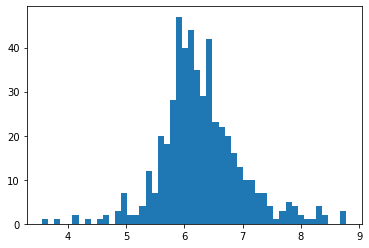

In [6]:
#  ANSWER
plt.hist(data['RM'], bins=50)

##### 2. Plot Histogram of `MEDV`

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

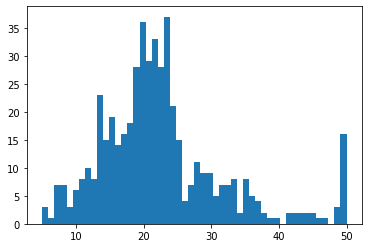

In [7]:
# ANSWER
plt.hist(data['MEDV'], bins=50)

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

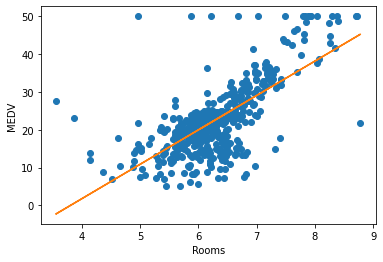

In [8]:
# ANSWER
#plt.scatter(data['RM'],data['MEDV'])
x = np.array(data['RM'])
y = np.array(data['MEDV'])
m, b = np.polyfit(x, y, 1)
plt.xlabel('Rooms')
plt.ylabel('MEDV')
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

In [9]:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)

AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population

RM - average number of rooms per dwelling
MEDV - Median value of owner-occupied homes in $1000's

SyntaxError: invalid syntax (<ipython-input-9-60b5ce9a75af>, line 1)

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [10]:
# ANSWER
alpha=0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [11]:
# ANSWER
RM_sample = data['RM'].sample(100)
MEDV_sample = data['MEDV'].sample(100)

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

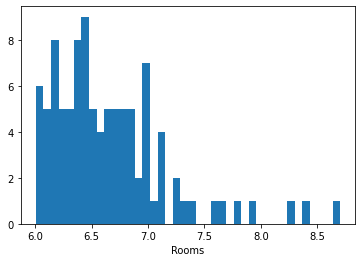

In [12]:
# ANSWER

SmallHouse = data.loc[data.loc[:, 'RM'] < 6, 'RM': 'RM'].sample(100).values.flatten()
LargeHouse = data.loc[data.loc[:, 'RM'] > 6, 'RM': 'RM'].sample(100).values.flatten()
plt.xlabel('Rooms')
_ = plt.hist(LargeHouse, bins=40)


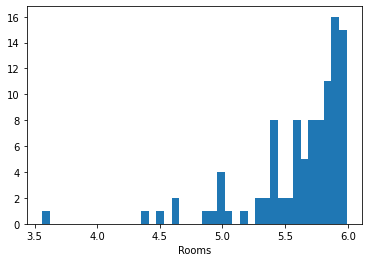

In [13]:
plt.xlabel('Rooms')
_ = plt.hist(SmallHouse, bins=40)



##### 7. Calculate Variance

Calculate variance for both samples.

In [19]:
# ANSWER
from statistics import variance

print(variance(SmallHouse), variance(LargeHouse))

0.16984050545454543 0.274559580909091


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

In [22]:
from statistics import stdev
SmallHouse_Std = stdev(SmallHouse)
LargeHouse_Std = stdev(LargeHouse)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [ ]:
# ANSWER
#sp = math.sqrt(((len(SmallHouse) - 1) * (SmallHouse_STD ** 2) + (len(LargeHouse) - 1) * (LargeHouse_Std ** 2)) / (len(SmallHouse) - 1 + len(LargeHouse) - 1))
#print(sp)

In [34]:
N1 = len(SmallHouse)
N2 = len(LargeHouse)

sp = np.sqrt(((N1 - 1) * (SmallHouse_Std ** 2) + (N2 - 1) * (LargeHouse_Std**2)) / (N1 + N2 - 2))
print(sp)

0.47138099577922976


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [35]:
# ANSWER

t = (LargeHouse.mean() - SmallHouse.mean())/(sp*np.sqrt(2/N1))
print(t)

15.61682934359647


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [48]:
# ANSWER
df= len(LargeHouse) + len(SmallHouse) -2
df

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 


In [49]:
# ANSWER
from scipy import stats
pp_value = 1 -  (stats.t.cdf(t, df=df))
pp_value

1.0

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [50]:
# ANSWER

def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [ ]:
# ANSWER

print_sig(p_value, alpha)

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [51]:
# ANSWER
# source - https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
# ANSWER
SmallHouseMean = np.mean(SmallHouse)
LargeHouseMean = np.mean(LargeHouse)
# sum squared difference between observations
for i in range (N1):
    d1 = (SmallHouse[i] - LargeHouse[i]) ** 2
# sum difference between observations
for i in range (N1):
    d2 = (SmallHouse[i] - LargeHouse[i])

# standard deviation of the difference between means    
sdd = np.sqrt((d1 - (d2**2 / N1)) / (N1 - 1))
sdd

0.09490000000000007

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [52]:
# ANSWER
#t = (SmallHouseMean - LargeHouseMean)/ sdd
a = np.random.randn(40)
b = 4*np.random.randn(50)
t, p = stats.ttest_ind(SmallHouse, LargeHouse, equal_var=False)
print(t,p)

-15.61682934359647 9.062573893175042e-36




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



